In [ ]:
from kafka import KafkaConsumer
from json import loads
import matplotlib.pyplot as plt

tmp_node_id = []
tmp_x = []
tmp_y = []

tmp_node = []
tmp_node2 = []
tmp_path = []

path = []

# kafka consumer connect
consumer = KafkaConsumer(
    'ok',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',
    enable_auto_commit=True,
    group_id='my_group',
    value_deserializer=lambda x: loads(x.decode('utf-8')))

plt.rcParams['animation.html'] = 'jshtml'
i = 0

# receive data from kafka producer and draw real time graph
for fmessage in consumer:
    fmessage = fmessage.value
    t,x,y,z = fmessage.split(",")
    if t == 'node':
        tmp_node.append(int(x))
        tmp_node2.append(int(y))
        tmp_path.append(float(z))
        print('node')
    elif t == 'path':
        path.append(x)
        print('path')
    else:
        tmp_node_id.append(int(x))
        tmp_x.append(float(y))
        tmp_y.append(float(z))
        print('no')

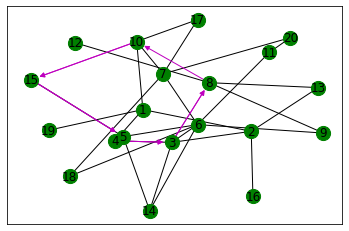

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for i in range(len(tmp_path)):
    tx = str(tmp_node[i])
    ty = str(tmp_node2[i])
    tz = int(tmp_path[i])
    G.add_edges_from([(tx,ty)],weight = tz)

# Specify the edges you want here
red_edges = []
for i in range(len(path)-1):
    red_edges.append((str(path[i]),str(path[i+1])))
# red_edges = [('1', '3'), ('5', '3')]
edge_colours = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = 'g', node_size = 200)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='m', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()